In [1]:
import numpy as np
from IPython.display import clear_output
from E2_AnalysisHelpers import *

rnds = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
        "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]
yrs = ["2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014",
       "2013", "2012", "2011", "2010", "2009", "2008", "2007", "2006"]

thisYr = "2021"
thisRnd = "16"

print("done")

done


In [2]:
# collate all pre-race dataframes, and add column of race finishing positions
pas = "empty"
dF = []

print("--------------------------------\ngetting dataframes and collating\n--------------------------------\n")
for yr in yrs:
    print("   " + yr)
    dF, pas = getWholeFrame(pas, dF, yr)

# add weather
wF = mergeWeather(dF)

clear_output(wait=True)
print("done")

done


In [12]:
nf = wF
thisYr = int(thisYr)
thisRnd = int(thisRnd)
recentDF = nf.loc[(nf["yr"] == thisYr) & (nf["rnd"] == thisRnd)]
lstYr = int(thisYr) - 1
thisTrk = recentDF["trk"].iloc[0]

lastDF = nf.loc[(nf["yr"] == lstYr) & (nf["trk"] == thisTrk)]
lstRnds = lastDF.rnd.unique()
lstRnds

array([7, 8], dtype=int64)

In [22]:
frames = []

for rnd in lstRnds:
    files = getFiles(csvFinalDir, f"{lstYr}-MotoGP-Rnd_{rnd}-Result.csv")
    for file in files:
        frame = pd.read_csv(file)
        frames.append(frame)

lstFrame = pd.concat(frames)
lDF = lstFrame.drop(['index', 'month', 'day', 'f_tire', 'r_tire', 'laps_on_f', 'laps_on_r', 'lap_scaled', 'one_scaled',
                   'two_scaled', 'thr_scaled', 'fr_scaled', 'rdr_num', 'f_name', 'l_name', 'nat', 'team',
                   'num_of_laps', 'avg_spd', 'start_pos', 'one_val', 'two_val', 'thr_val', 'four_val', 'lap_time',
                   'lap_val', 'pit', 'sec_one', "one_seconds", "two_seconds", "thr_seconds", "four_seconds"], axis = 1)

print("done")

done


In [27]:
lapNums = []
laps = lDF.lap_num.unique()
lDF = lDF[lDF["lap_seconds"].notna()]
# lDF = lDF.loc[(lDF["manu"] == "Ducati")]
laps.sort()
for lap in laps[:-1]: lapNums.append(lap)

means = []
xLaps = []

for lap in lapNums:
    lapDF = lDF.loc[lDF["lap_num"] == lap]
    lapDF = lapDF[lapDF["lap_seconds"].notna()]
    
#     lapCol = lapDF["lap_seconds"]
#     times = []
#     for time in lapCol:
#         try:
#             time = float(time)
# #             print(time)
#             times.append(time)
#         except:
#             pass
    
#     print(len(times))
#     x = 0
#     for i in times:
#         x = x + i
    
#     mean = x / len(times)
#     print(mean)

    try:
        mean = float(lapDF[["lap_seconds"]].mean())
#         mean = float(lapCol.mean())
        means.append(mean)
        xLaps.append(lap)
        print(f"{lap}   {mean}")
    except:
        pass

0   94.01705277363652
1   100.0119445008058
2   94.31858333333334
3   93.67025000000001
4   93.70991666666667
5   93.66633333333334
6   93.58558333333333
7   93.34925
8   93.50829761904761
9   93.58809090909091
10   93.36036363636363
11   93.37072727272727
12   93.40718181818183
13   93.50370000000001
14   93.5796
15   93.3889
16   93.383
17   93.37179999999998
18   93.4449
19   93.3927
20   93.4162
21   93.4768888888889
22   93.98277777777777
23   93.607
24   93.97625
25   93.79525000000001
26   93.928375


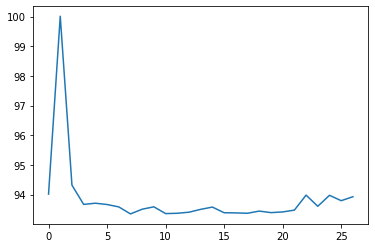

In [28]:
aLaps = np.array(xLaps)
aMeans = np.array(means)

# Create a graph based upon the list and array we have created
plt.plot(aLaps, aMeans)
# Show the graph that we have created
plt.show()


In [ ]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

# nF = nFrame.drop(["run_num", "f_tire", "r_tire", "laps_on_f", "laps_on_r", "pit", "lge", "rnd", "trk", "manu", "index",
#                   "month", "day", "yr", "pos", "nat", "num_of_laps", "lap_num", "lap_time", "lap_val", "sec_one", "one_val",
#                   "sec_two", "two_val", "sec_thr", "thr_val", "sec_four", "four_val", "avg_spd"], axis = 1)

# val = {"result": "DNF"}
# xf = nF.fillna(value = val)
# xf = xf[["session", "f_name", "l_name", "rdr_num", "team", "lap_seconds", "lap_scaled", "one_seconds", "one_scaled",
#          "two_seconds", "two_scaled", "thr_seconds", "thr_scaled", "four_seconds", "fr_scaled", "start_pos", "result"]]

# yf = xf.sort_values(by=["session", "result"])

# yf